# Import Lib

In [ ]:
!pip install bing-image-downloader #install
!mkdir images #make dir

from bing_image_downloader import downloader #download image for train and test data
import os #play around the folder
import matplotlib.pyplot as plt #show output
import numpy as np #mathematical operation
from skimage.io import imread #image read
from skimage.transform import resize #resize the image
from sklearn.model_selection import train_test_split #split test train dataset
from sklearn.model_selection import GridSearchCV #train model
from sklearn import svm #predict the output
from sklearn.metrics import accuracy_score,confusion_matrix #finding Accuracy
import pickle #save a model

# Gathering data

In [ ]:
!pip install bing-image-downloader
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
downloader.download("circle shape",limit=40,output_dir="images", adult_filter_off=True)
downloader.download("square shape",limit=40,output_dir="images", adult_filter_off=True)
downloader.download("triangle shape",limit=40,output_dir="images", adult_filter_off=True)
downloader.download("star shape",limit=40,output_dir="images", adult_filter_off=True)

[%] Downloading Images to /content/images/circle shape


[!!]Indexing page: 1

[%] Indexed 40 Images on Page 1.


[%] Downloading Image #1 from https://dashingdiva.com.au/wp-content/uploads/2021/01/InShot_20210121_180111242.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0034/8314/0209/products/Bluetooth-Speaker-Tronsmart-Element-Splash-7W-Deep-Bass-Round-Shape-True-Wireless-Stereo_994x994.jpg?v=1633462992
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/1f/4f/1f/1f4f1f562d2d60f2378350f1f28a4e06.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://images-na.ssl-images-amazon.com/images/I/914SPpDg7cL._AC_SX679_.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/ed/65/a7/ed65a7d0f9ff5937249ff92db12859f8.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ebayimg.com/images/g/LRUAAOSwVYtbs~3E/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #7 fro

# Pre-processing
## 1. Resize
## 2. Flattening

In [ ]:


target = []
images = []
flat_data = [] #to process into machine learning algo

DATADIR = '/content/images'
CATEGORIES = ['circle shape','square shape','triangle shape','star shape']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #label Encoding the values
  path = os.path.join(DATADIR,category) #create path to use all the a images
  print(path)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) #resize
    flat_data.append(img_resized.flatten()) #flatten
    images.append(img_resized)
    target.append(class_num)


flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)


/content/images/circle shape
/content/images/square shape
/content/images/triangle shape


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/content/images/star shape


In [ ]:
# Split data into train and Test
x_train, X_test, y_train, y_test = train_test_split(flat_data,target, test_size = 0.3, random_state=0)

# Finding best algo & Train model

In [ ]:

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]


svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

# Predict

In [ ]:
#predict
y_pred = clf.predict(X_test)

In [ ]:
# finding accuarcy
accuracy_score(y_pred,y_test)

0.5416666666666666

In [ ]:
# finding confusion_matrix
confusion_matrix(y_pred,y_test)

array([[6, 2, 1, 4],
       [4, 8, 2, 4],
       [0, 0, 8, 1],
       [0, 3, 1, 4]])

In [ ]:
#Save the model using Pickle Library
pickle.dump(clf,open('img_model.p','wb'))

# Load a model

In [ ]:
model = pickle.load(open('img_model.p','rb'))

#Testing the brand new image

Enter the URLhttps://www.seekpng.com/png/detail/139-1399549_small-yellow-star-shape-png.png
(544, 820, 3)
PREDICTED OUTPUT: circle shape


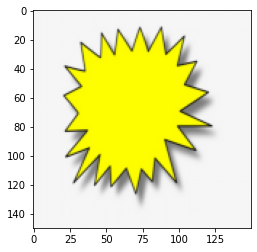

In [ ]:
flat_data = []

url = input('Enter the URL')
img = imread(url)

img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())

flat_data = np.array(flat_data)

print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]

print(f'PREDICTED OUTPUT: {y_out}')\

In [ ]:
# https://www.seekpng.com/png/detail/139-1399549_small-yellow-star-shape-png.png
# https://www.clipartkey.com/mpngs/m/291-2919053_square-shaped-objects-clipart.png
# https://i.ytimg.com/vi/2wFMdKb0cz0/maxresdefault.jpg
# https://th.bing.com/th/id/OIP.r3L8_KIwY4RW0NhW8pUC6wHaE8?pid=ImgDet&rs=1